In [1]:
import os
# Find the latest version of spark 3.2 from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.2.3'
spark_version = 'spark-3.2.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [2,235 kB]
Get:13 http://ppa

In [2]:
# Download the Postgres driver that will allow Spark to interact with Postgres.
!wget https://jdbc.postgresql.org/download/postgresql-42.2.16.jar

--2022-12-28 04:07:44--  https://jdbc.postgresql.org/download/postgresql-42.2.16.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002883 (979K) [application/java-archive]
Saving to: ‘postgresql-42.2.16.jar’

postgresql-42.2.16. 100%[===================>] 979.38K  1.59MB/s    in 0.6s    

2022-12-28 04:07:46 (1.59 MB/s) - ‘postgresql-42.2.16.jar’ saved [1002883/1002883]



In [3]:
# Start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ETL_final_project").config("spark.driver.extraClassPath","/content/postgresql-42.2.16.jar").getOrCreate()

In [4]:
# import libraries for Exploratory Data Analysis
import pandas as pd
from pyspark import SparkFiles
import numpy as no
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
# Drive helper
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# path ="/content/drive/MyDrive/data/Daily_County-Level_Ozone_Concentrations__2001-2016.csv"
# spark.sparkContext.addFile(path)
# df = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep=",", header=True, inferSchema=True)
# df.show()

In [6]:
path ="/content/drive/MyDrive/data/Daily_County-Level_Ozone_Concentrations__2001-2016.csv"
ozone_df= pd.read_csv(path)
ozone_df.tail()


,Year,Month,Day,statefips,countyfips,O3_max_pred,O3_med_pred,O3_mean_pred,O3_pop_pred
18168991,2016,DEC,31,56,37,41.8023,40.98200,40.954517,41.030787
18168992,2016,DEC,31,56,39,39.8256,39.24925,39.252300,39.160351
18168993,2016,DEC,31,56,41,42.7244,39.59090,40.449267,40.374935
18168994,2016,DEC,31,56,43,35.3622,33.30220,33.924567,34.047683
18168995,2016,DEC,31,56,45,39.6921,38.58465,38.584650,38.673762


In [7]:
path2="/content/drive/MyDrive/data/cancer_incidence.csv"
df_cancer=pd.read_csv(path2)
pd.set_option('display.max_columns', None)
df_cancer.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


In [8]:
#get numbber of rows and columns
ozone_df.shape

(18168996, 9)

In [9]:
df_cancer.shape

(3141, 11)

In [10]:
df_cancer.dtypes

index                                                  int64
County                                                object
 FIPS                                                  int64
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    object
Lower 95% Confidence Interval                         object
Upper 95% Confidence Interval                         object
Average Annual Count                                  object
Recent Trend                                          object
Recent 5-Year Trend (ˆ) in Incidence Rates            object
Lower 95% Confidence Interval.1                       object
Upper 95% Confidence Interval.1                       object
dtype: object

In [13]:
duplicate_cancer_df = df_cancer[df_cancer.duplicated()]
print('duplicacte_cancer_df: ', duplicate_cancer_df.shape)

duplicacte_cancer_df:  (0, 11)


In [12]:
duplicate_ozone_df = ozone_df[ozone_df.duplicated()]
print('duplicate_ozone_df: ', duplicate_ozone_df.shape)

duplicate_ozone_df:  (0, 9)


In [14]:
ozone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18168996 entries, 0 to 18168995
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Year          int64  
 1   Month         object 
 2   Day           int64  
 3   statefips     int64  
 4   countyfips    int64  
 5   O3_max_pred   float64
 6   O3_med_pred   float64
 7   O3_mean_pred  float64
 8   O3_pop_pred   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.2+ GB


In [15]:
ozone_df.isnull().values.any()

False

In [16]:
df_cancer.isnull().sum().sum()

0

In [17]:
ozone_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,18168996.0,2008.501027,4.609846,2001.000000,2004.750000,2008.50000,2012.250000,2016.000000
Day,18168996.0,15.729637,8.800092,1.000000,8.000000,16.00000,23.000000,31.000000
statefips,18168996.0,30.575105,14.964198,1.000000,19.000000,29.00000,46.000000,56.000000
countyfips,18168996.0,103.437440,108.064243,1.000000,35.000000,79.00000,133.000000,840.000000
O3_max_pred,18168996.0,41.212981,12.202074,0.940476,32.424334,40.03070,48.877900,147.443510
O3_med_pred,18168996.0,40.080713,12.034281,0.524195,31.446659,39.04875,47.827332,137.066281
O3_mean_pred,18168996.0,40.098398,12.006874,0.755492,31.474275,39.06665,47.834200,136.500010
O3_pop_pred,18168996.0,40.094743,12.011415,0.676899,31.466675,39.06188,47.832787,135.343729


In [18]:
df_cancer.iloc[68]

index                                                                                   68
County                                                Aleutians East Borough, Alaska(6,10)
 FIPS                                                                                 2013
Age-Adjusted Incidence Rate(Ê) - cases per 100,000                                      * 
Lower 95% Confidence Interval                                                            *
Upper 95% Confidence Interval                                                            *
Average Annual Count                                                            3 or fewer
Recent Trend                                                                             *
Recent 5-Year Trend (ˆ) in Incidence Rates                                               *
Lower 95% Confidence Interval.1                                                          *
Upper 95% Confidence Interval.1                                                          *

In [19]:
df_cancer.describe()

,index,FIPS
count,3141.000000,3141.000000
mean,1570.000000,30392.281757
std,906.872924,15158.200839
min,0.000000,0.000000
25%,785.000000,18179.000000
50%,1570.000000,29177.000000
75%,2355.000000,45081.000000
max,3140.000000,56045.000000


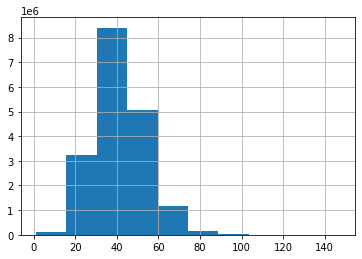

In [20]:
ozone_df.O3_max_pred.hist()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


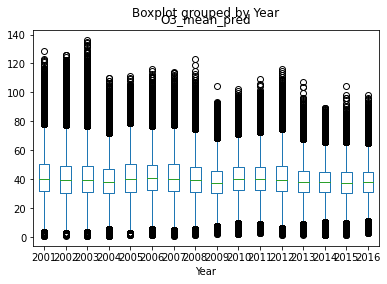

In [21]:
ozone_df.boxplot(by = 'Year', column=['O3_mean_pred'], grid= False)

In [22]:
# Remove years after 2014
ozone_df= ozone_df[ozone_df['Year']<=2014]


In [23]:
ozone_df=ozone_df.astype({'statefips':'string', 'countyfips':'string'})


In [24]:
ozone_df.dtypes

Year              int64
Month            object
Day               int64
statefips        string
countyfips       string
O3_max_pred     float64
O3_med_pred     float64
O3_mean_pred    float64
O3_pop_pred     float64
dtype: object

In [25]:
ozone_df ['FIPS']= ozone_df['statefips'].astype(str) + ozone_df['countyfips']
ozone_df.head()

,Year,Month,Day,statefips,countyfips,O3_max_pred,O3_med_pred,O3_mean_pred,O3_pop_pred,FIPS
0,2001,JAN,1,1,1,31.939058,31.691988,31.680859,31.671226,11
1,2001,JAN,1,1,3,33.646855,33.170271,32.994775,32.935070,13
2,2001,JAN,1,1,5,34.288917,34.068507,34.077954,34.086631,15
3,2001,JAN,1,1,7,30.349767,30.036093,29.931756,29.991733,17
4,2001,JAN,1,1,9,26.472655,25.776595,25.857571,25.872472,19


In [26]:
ozone_df=ozone_df.astype({'FIPS':'int'})

In [27]:
#aggreagate ozone data by county
ozone_agg_df = ozone_df.groupby('FIPS').agg({'O3_max_pred':'mean','O3_med_pred':'mean','O3_mean_pred':'mean'})
ozone_agg_df.reset_index(inplace=True)
ozone_agg_df

,FIPS,O3_max_pred,O3_med_pred,O3_mean_pred
0,11,41.001571,39.948742,39.921898
1,13,45.070022,41.241604,41.341833
2,15,41.139416,40.185889,40.162437
3,17,40.505549,39.399455,39.389288
4,19,42.714107,41.096201,41.085945
...,...,...,...,...
3020,55133,38.945330,36.419724,36.515294
3021,55135,39.086669,38.129168,38.118226
3022,55137,39.383301,38.640274,38.622163
3023,55139,39.368464,38.237115,38.154423


In [28]:
len(ozone_agg_df)

3025

In [29]:
df = pd.merge(df_cancer, ozone_agg_df, how='inner', left_on=' FIPS', right_on='FIPS')
df.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,FIPS,O3_max_pred,O3_med_pred,O3_mean_pred
0,51,"Montgomery County, Alabama(6,10)",1101,61,56.5,65.6,144,falling,-9.6,-15.1,-3.8,1101,41.874165,39.939759,39.977164
1,52,"Morgan County, Alabama(6,10)",1103,80.4,74,87.4,116,stable,-3.2,-12,6.4,1103,43.308170,41.901690,41.888594
2,53,"Perry County, Alabama(6,10)",1105,83.1,62.5,108.8,11,stable,-5,-20.5,13.6,1105,39.805057,38.986625,39.022229
3,54,"Pickens County, Alabama(6,10)",1107,65.6,52.8,81,18,stable,-13.2,-26.2,2,1107,39.979953,39.173487,39.137133
4,55,"Pike County, Alabama(6,10)",1109,61.8,50.5,74.9,22,stable,-11.9,-35.2,19.8,1109,40.690546,39.856677,39.866958


In [30]:
len(df)

1234

# New Section